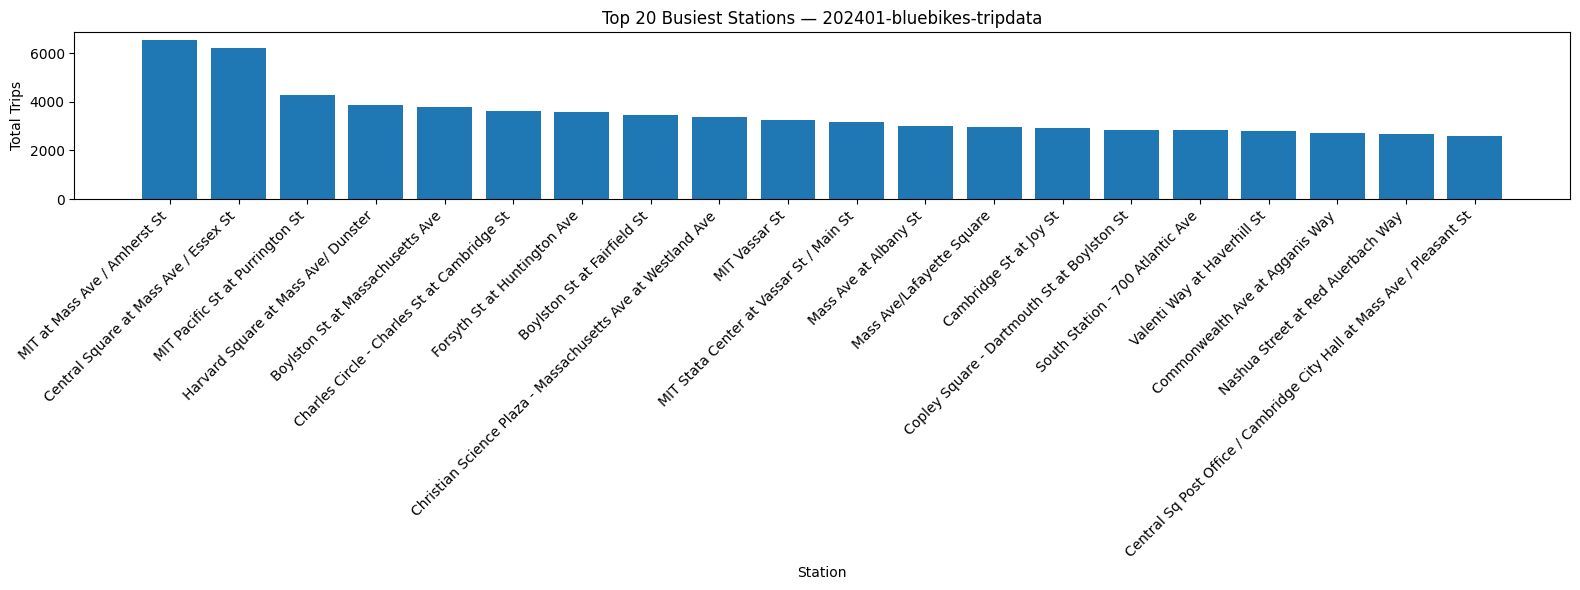

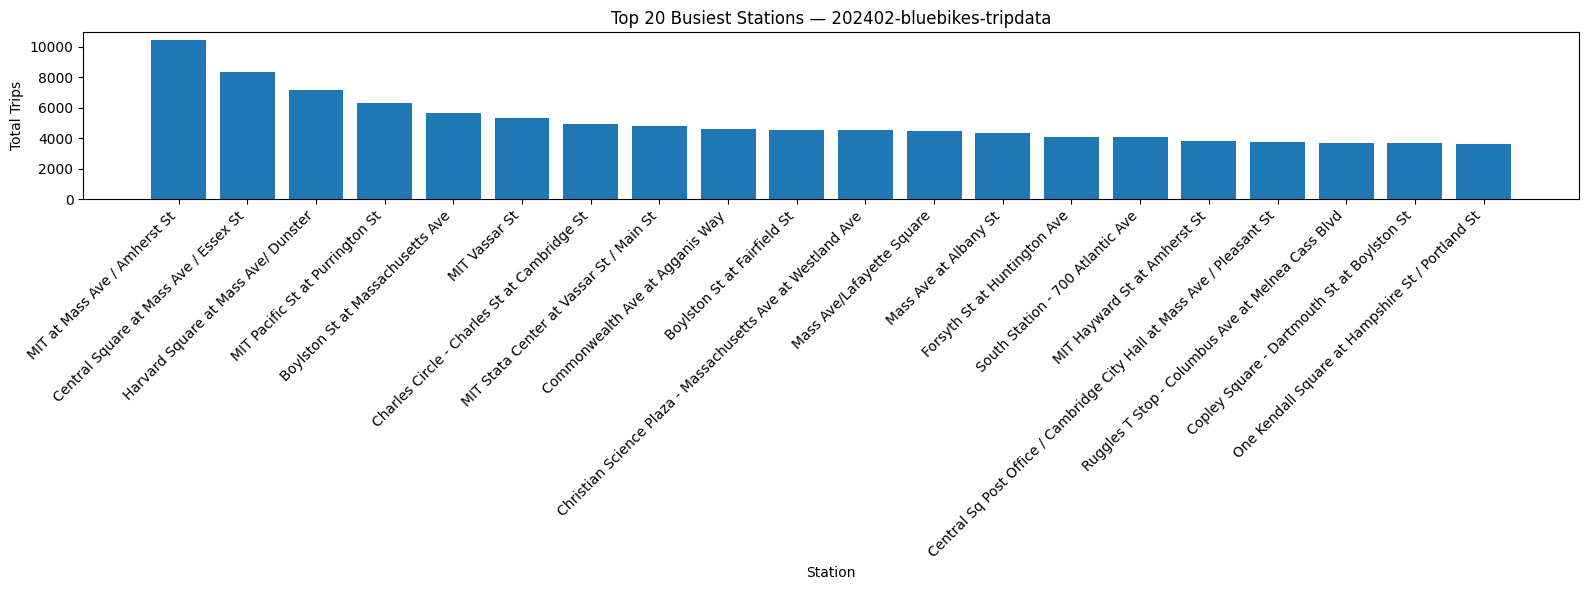

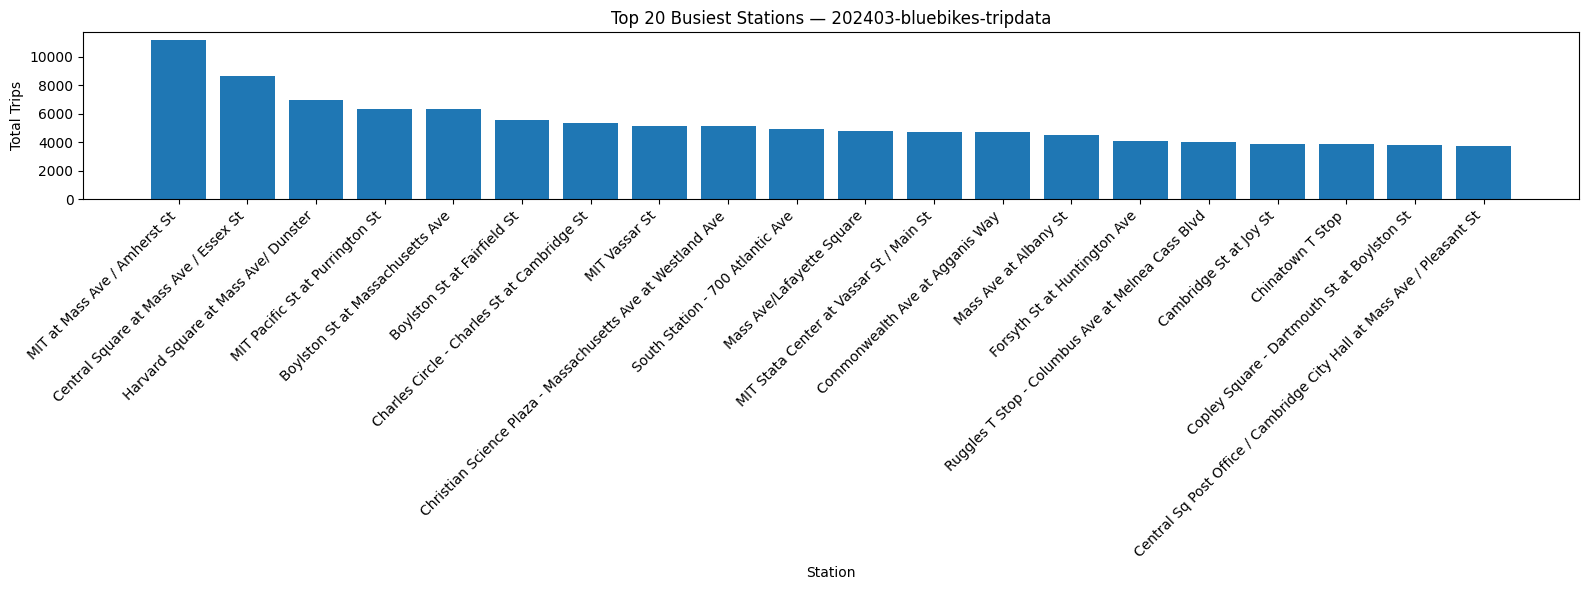

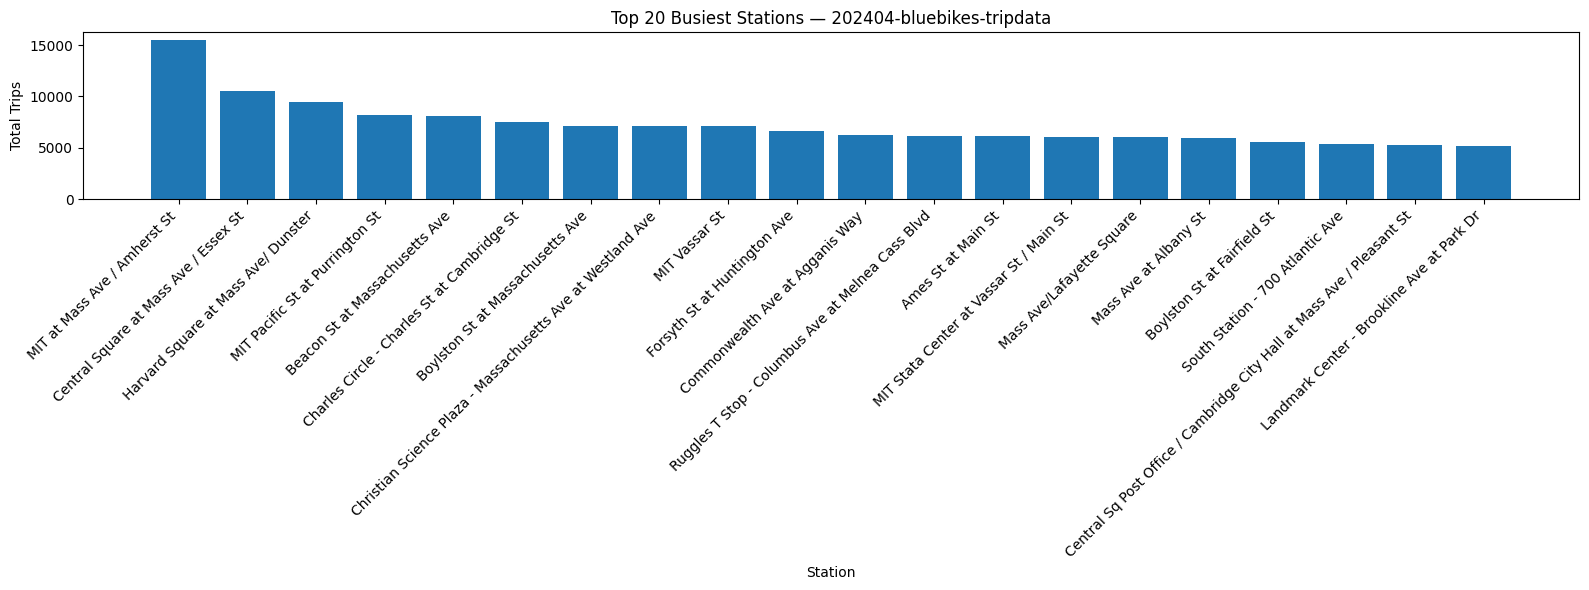

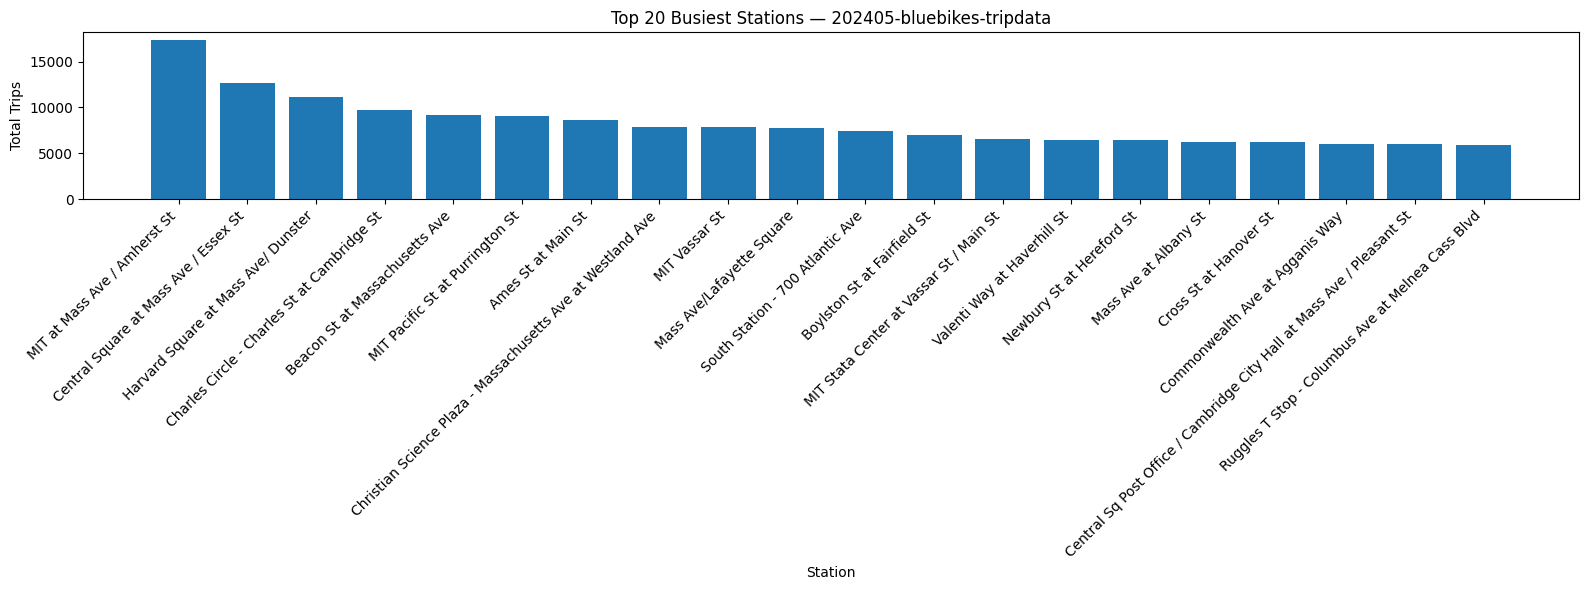

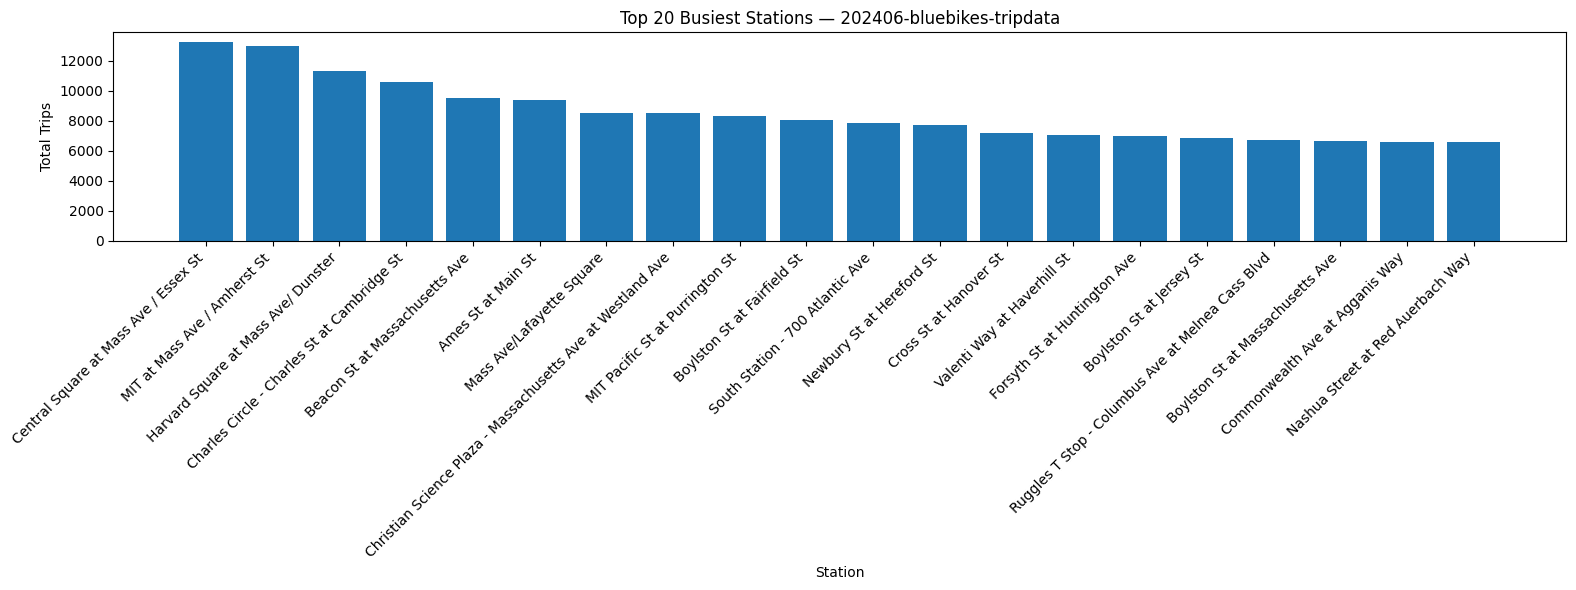

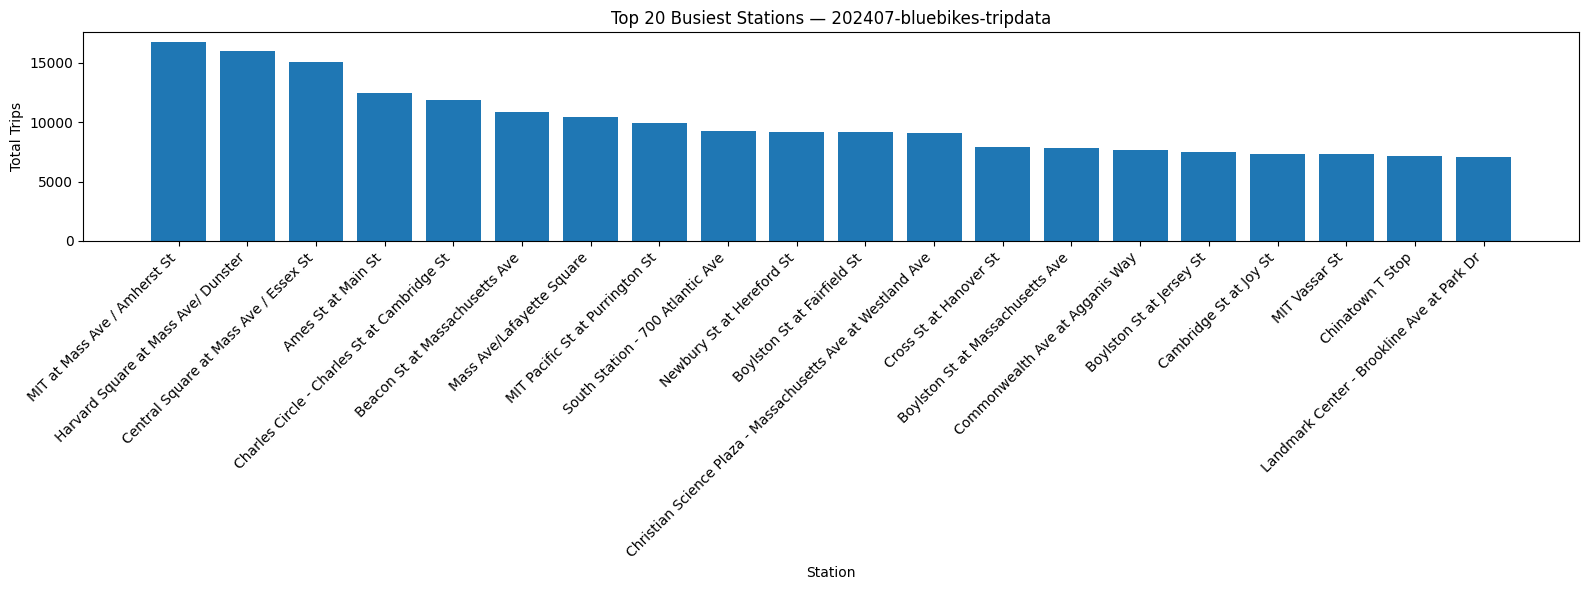

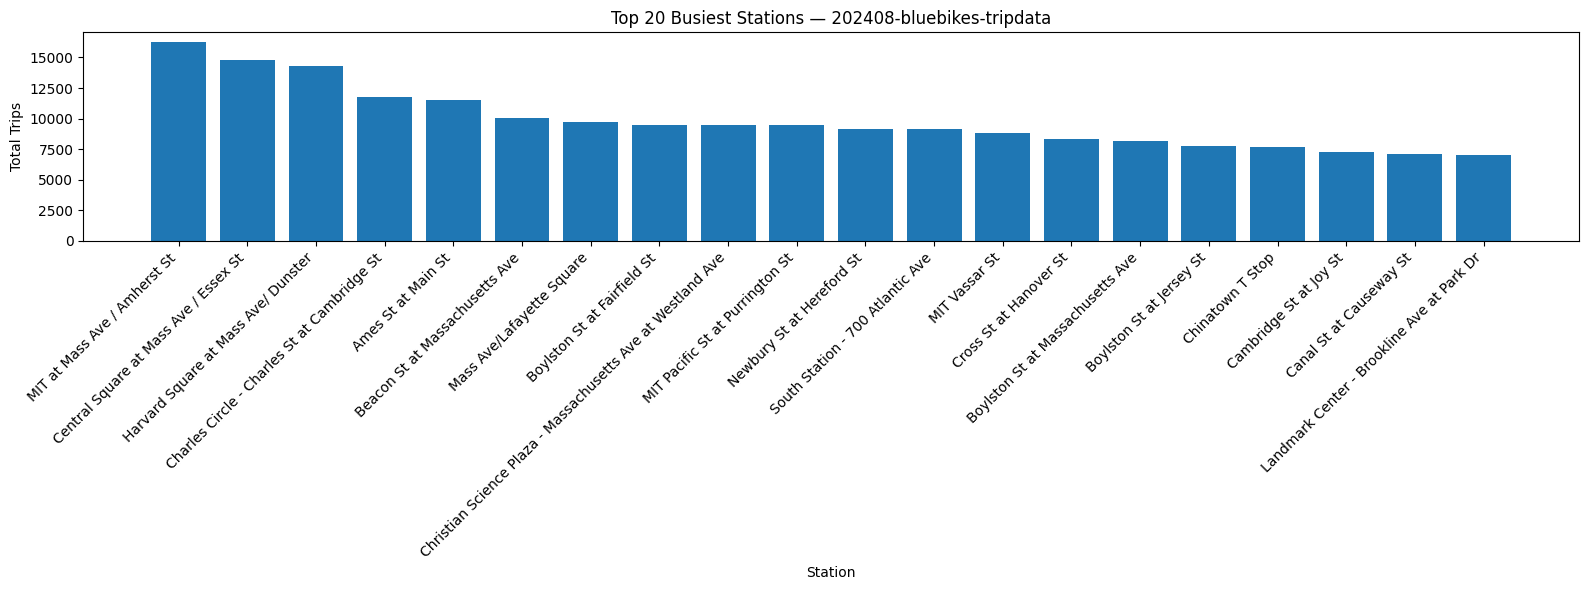

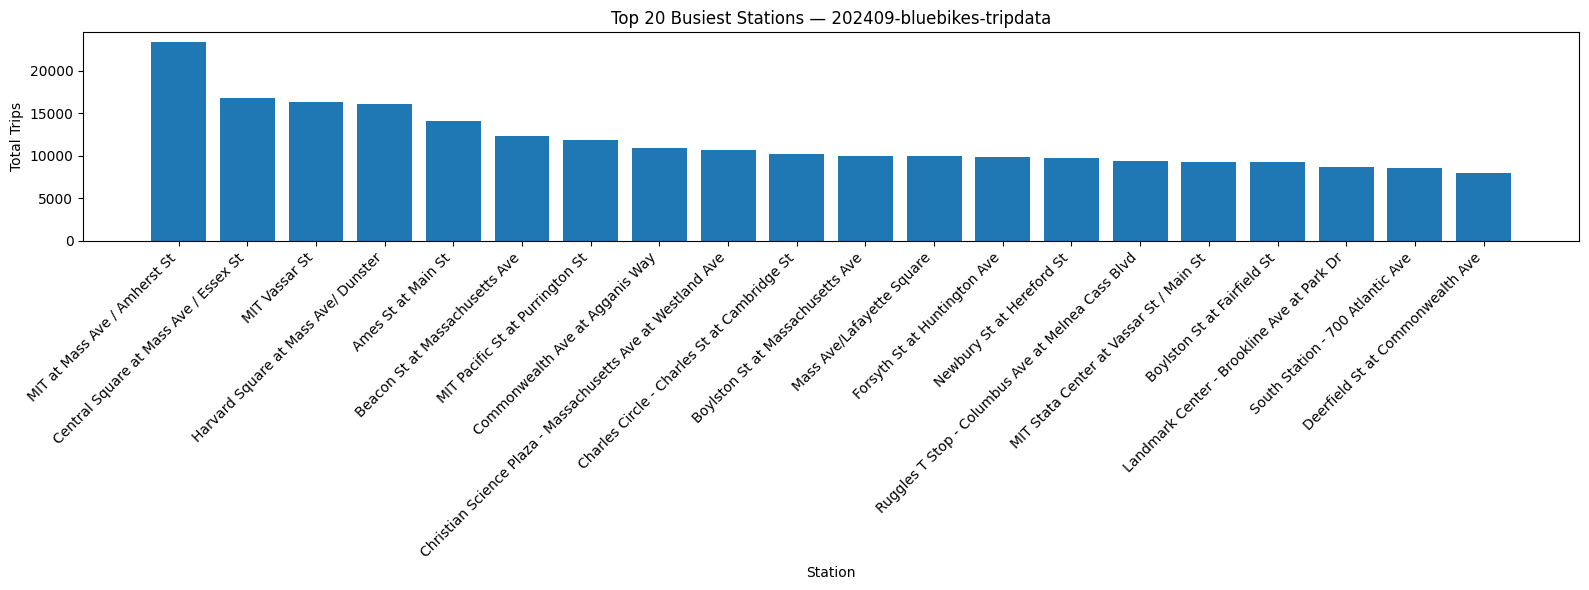

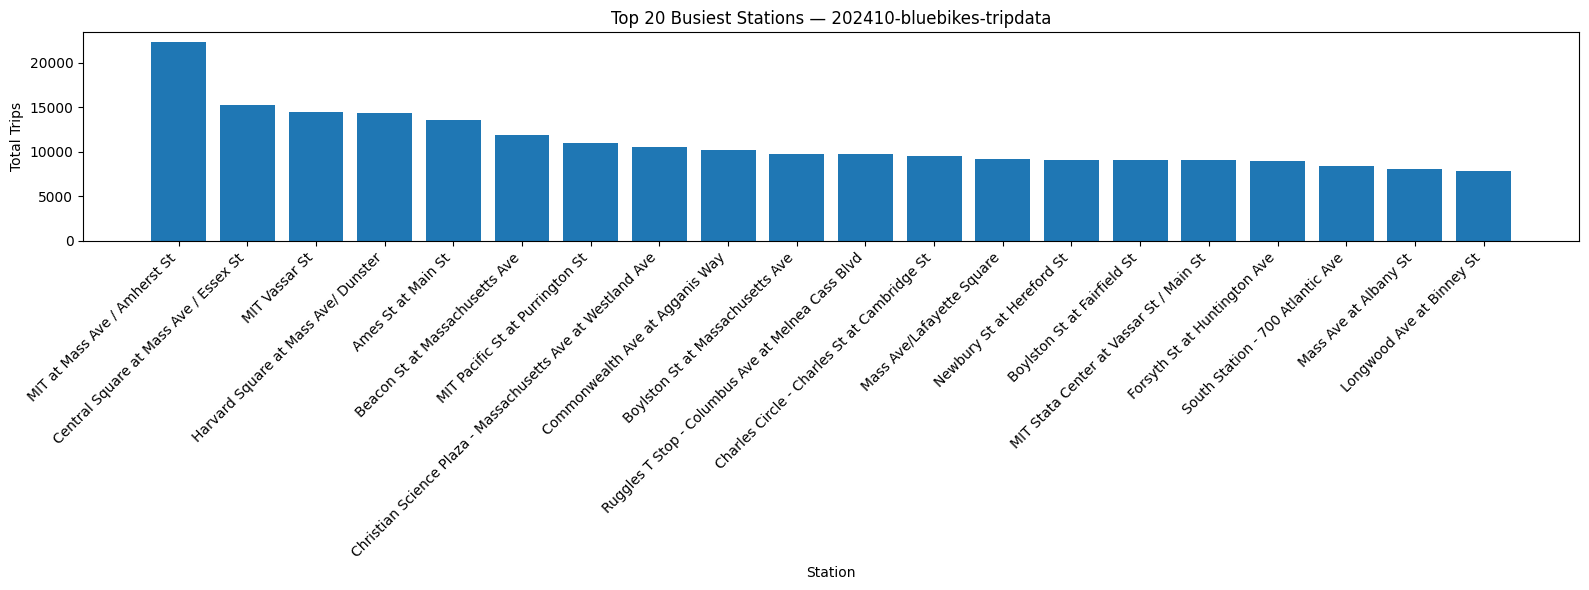

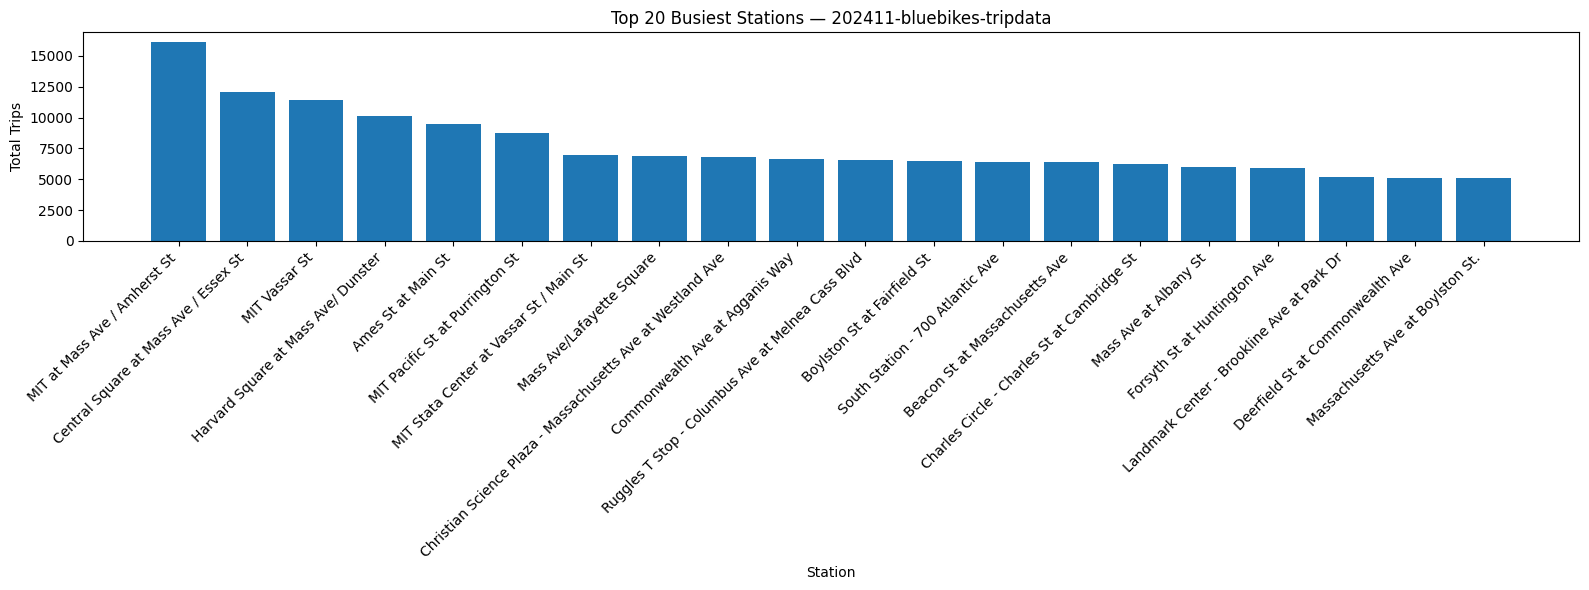

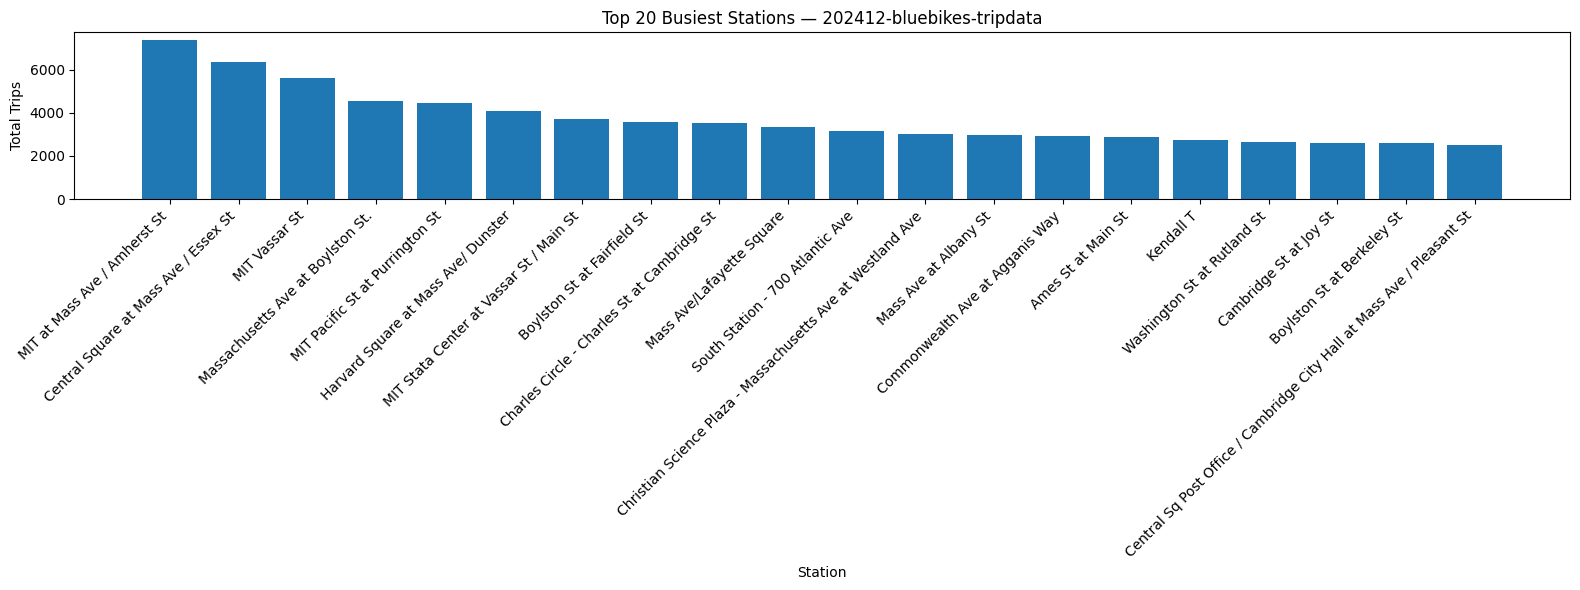

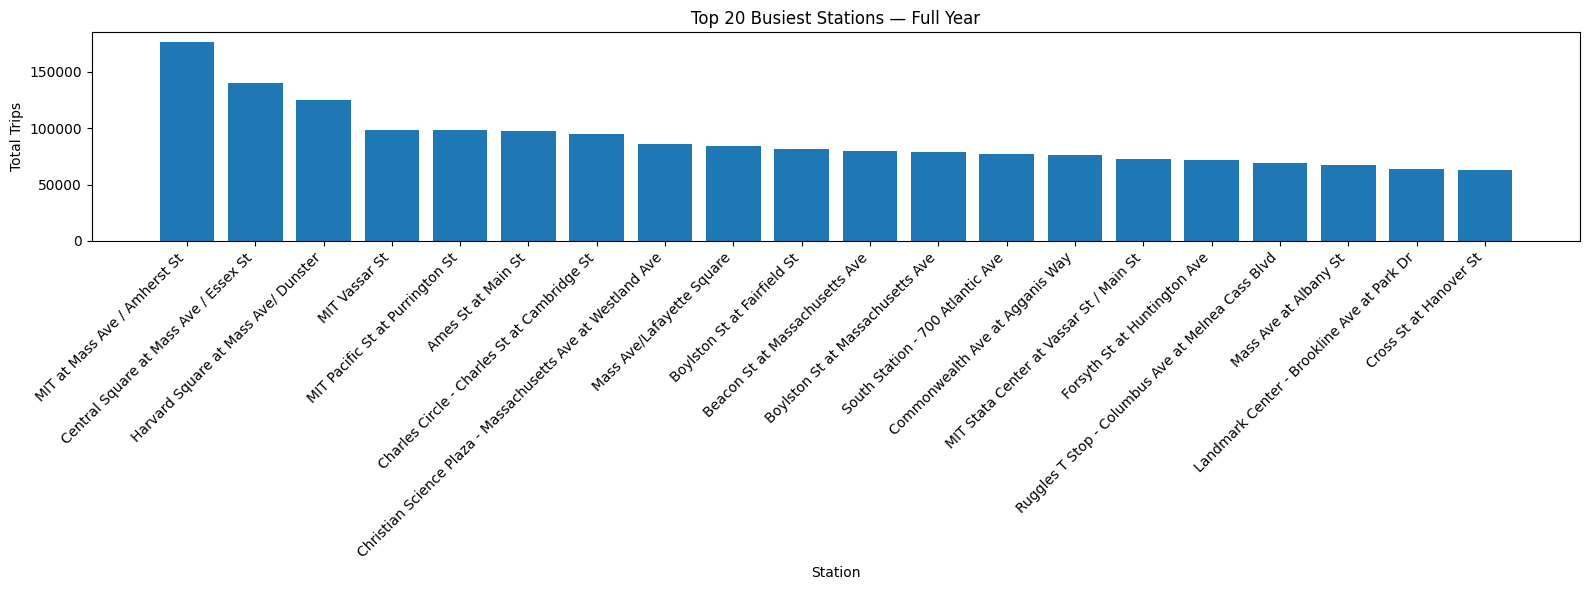

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# ---------------------
# 12 Monthly Graphs
# ---------------------
files = sorted(glob.glob("*-bluebikes-tripdata.csv"))

for file in files:
    df = pd.read_csv(file)
    df.columns = [
        "ride_id", "bike_type", "start_duration", "end_duration",
        "start_station_name", "start_station_id",
        "end_station_name", "end_station_id",
        "start_lat", "start_lng", "end_lat", "end_lng",
        "member_type"
    ]

    start_counts = df["start_station_name"].value_counts()
    end_counts = df["end_station_name"].value_counts()

    station_usage = pd.DataFrame({
        "starts": start_counts,
        "ends": end_counts
    }).fillna(0)

    station_usage["total_activity"] = station_usage["starts"] + station_usage["ends"]
    station_usage = station_usage.sort_values("total_activity", ascending=False)

    month_name = os.path.basename(file).replace(".csv", "")

    plt.figure(figsize=(16,6))
    plt.bar(
        station_usage.index[:20],
        station_usage["total_activity"][:20]
    )
    plt.xticks(rotation=45, ha="right")
    plt.title(f"Top 20 Busiest Stations — {month_name}")
    plt.xlabel("Station")
    plt.ylabel("Total Trips")
    plt.tight_layout()
    plt.show()


# ---------------------
# General FULL-YEAR Graph
# ---------------------
df_all = []

for file in files:
    temp = pd.read_csv(file)
    df_all.append(temp)

df_year = pd.concat(df_all, ignore_index=True)

df_year.columns = [
    "ride_id", "bike_type", "start_duration", "end_duration",
    "start_station_name", "start_station_id",
    "end_station_name", "end_station_id",
    "start_lat", "start_lng", "end_lat", "end_lng",
    "member_type"
]

start_counts = df_year["start_station_name"].value_counts()
end_counts = df_year["end_station_name"].value_counts()

station_usage_year = pd.DataFrame({
    "starts": start_counts,
    "ends": end_counts
}).fillna(0)

station_usage_year["total_activity"] = station_usage_year["starts"] + station_usage_year["ends"]
station_usage_year = station_usage_year.sort_values("total_activity", ascending=False)

plt.figure(figsize=(16,6))
plt.bar(
    station_usage_year.index[:20],
    station_usage_year["total_activity"][:20]
)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Busiest Stations — Full Year")
plt.xlabel("Station")
plt.ylabel("Total Trips")
plt.tight_layout()
plt.show()